In [17]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.dpi'] = 100

In [8]:
df = pd.read_csv('cleaned_data.csv')

In [10]:
feature_response = df.columns.tolist()
feature_response[:5]

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [11]:
feature_response[-5:]

['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

In [12]:
itens_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION_CAT', 'graduate school', 'high school', 'none', 'others', 'university']

In [13]:
feature_response = [item for item in feature_response if item not in itens_to_remove]
feature_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [14]:
corr = df[feature_response].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


<Axes: >

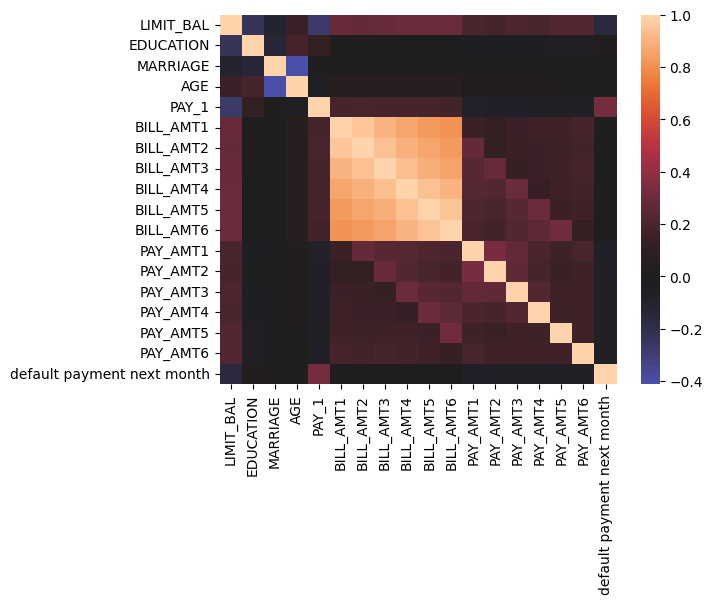

In [19]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, center=0)

# Exercício 11

In [20]:
X = df[feature_response].iloc[:,:-1].values
Y = df[feature_response].iloc[:,-1].values
X.shape, Y.shape

((26664, 17), (26664,))

In [23]:
from sklearn.feature_selection import f_classif

In [24]:
[f_stat, f_p_value] = f_classif(X, Y)

In [25]:
f_test_df = pd.DataFrame({'Feature': feature_response[:-1], 
                          'F statistic': f_stat, 
                          'p value': f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


In [26]:
from sklearn.feature_selection import SelectPercentile

In [27]:
selector = SelectPercentile(f_classif, percentile=20)

In [28]:
selector.fit(X, Y)

SelectPercentile(percentile=20)

In [29]:
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [30]:
features = feature_response[:-1]

In [31]:
best_features = [features[counter] for counter in range(len(features)) if best_feature_ix[counter]]

In [32]:
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

# Exercício 12

In [34]:
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [35]:
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month': 'mean'})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


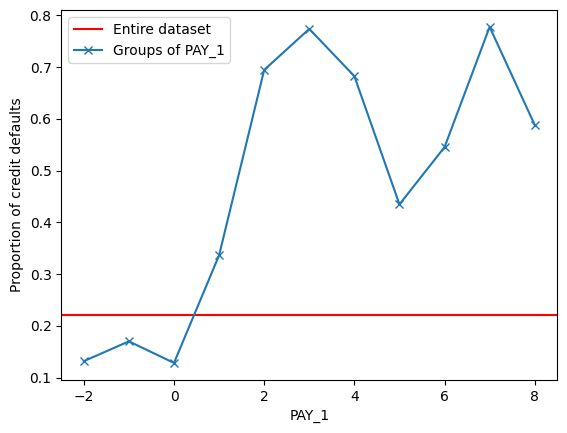

In [36]:
axes = plt.axes()
axes.axhline(overall_default_rate, color='red')
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire dataset', 'Groups of PAY_1'])

In [37]:
pos_mask = Y == 1
neg_mask = Y == 0

Text(0.5, 1.0, 'Credit limits by response variable')

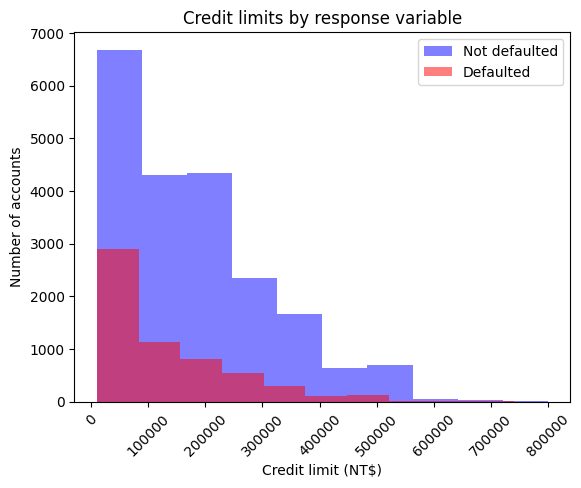

In [39]:
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], alpha=0.5, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], alpha=0.5, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')

In [43]:
df['LIMIT_BAL'].max()

800000

In [41]:
bin_edges = list(range(0, 850000, 50000))
bin_edges[-1]

800000

/var/folders/gk/5wp3t1bs4g31vy6yjwxt0zyw0000gn/T/ipykernel_1213/3414483302.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_yticklabels(np.round(y_ticks*50000,2))


Text(0.5, 1.0, 'Normalized distribution of credit limits by response variable')

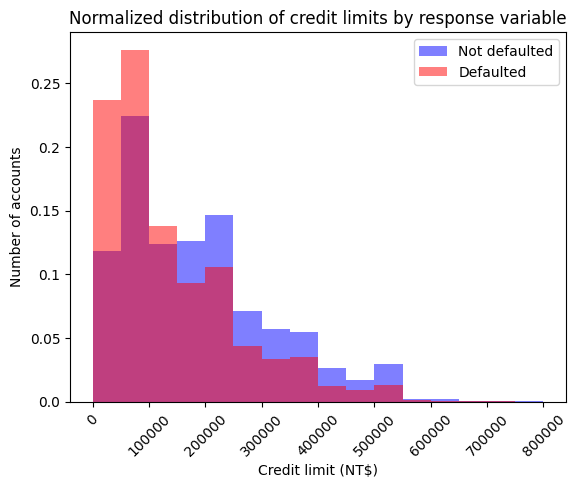

In [45]:
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], alpha=0.5, color='blue', bins=bin_edges, density=True)
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], alpha=0.5, color='red', bins=bin_edges, density=True)
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Number of accounts')
y_ticks = axes.get_yticks() 
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Normalized distribution of credit limits by response variable')

# Exercício 14

In [46]:
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


In [47]:
p = group_by_pay_mean_y['default payment next month'].values

In [48]:
q = 1-p
print(p)    
print(q)

[0.13166397 0.17000198 0.12829525 0.33639988 0.69470143 0.7739726
 0.68253968 0.43478261 0.54545455 0.77777778 0.58823529]
[0.86833603 0.82999802 0.87170475 0.66360012 0.30529857 0.2260274
 0.31746032 0.56521739 0.45454545 0.22222222 0.41176471]


In [49]:
odds_ratio = p/q
log_odds_ratio = np.log(odds_ratio)
log_odds_ratio

array([-1.88632574, -1.58561322, -1.91611649, -0.67937918,  0.82219194,
        1.23088026,  0.76546784, -0.26236426,  0.18232156,  1.25276297,
        0.35667494])

In [50]:
group_by_pay_mean_y.index

Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='PAY_1')

Text(0.5, 0, 'Values of PAY_1')

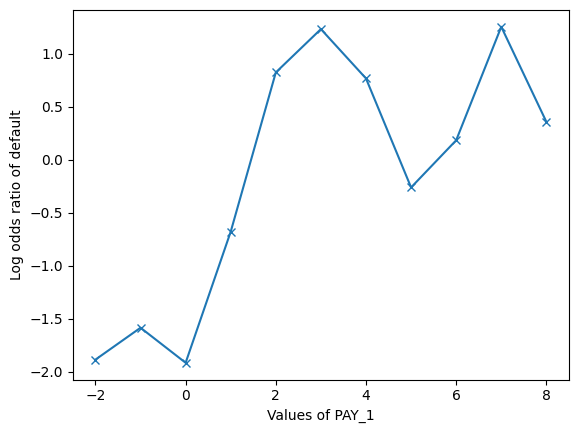

In [52]:
plt.plot(group_by_pay_mean_y.index, log_odds_ratio, marker='x')
plt.ylabel('Log odds ratio of default')
plt.xlabel('Values of PAY_1')

# Exercício 15

In [53]:
np.random.seed(6)

In [54]:
X_1_pos = np.random.uniform(low=-1, high=7, size=(20,1))
print(X_1_pos[0:3])
X_1_neg = np.random.uniform(low=3, high=10, size=(20,1))
print(X_1_neg[0:3])
X_2_pos = np.random.uniform(low=-1, high=7, size=(20,1))
print(X_2_pos[0:3])
X_2_neg = np.random.uniform(low=3, high=10, size=(20,1))
print(X_2_neg[0:3])

[[6.14288121]
 [1.65583844]
 [5.56983298]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]
[[4.97208574]
 [4.79256454]
 [2.24886237]]
[[9.19684856]
 [9.83587114]
 [8.85836015]]


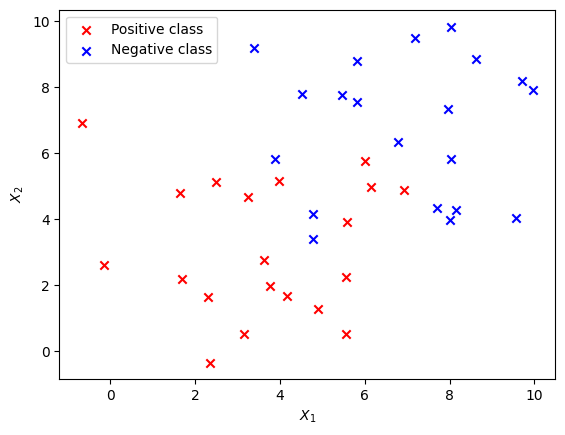

In [55]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class'])

In [56]:
X = np.block([[X_1_pos, X_2_pos], [X_1_neg, X_2_neg]])
print(X.shape)
print(X[0:3])

(40, 2)
[[6.14288121 4.97208574]
 [1.65583844 4.79256454]
 [5.56983298 2.24886237]]


In [57]:
y = np.vstack((np.ones((20,1)), np.zeros((20,1)))).reshape(40,)
print(y.shape)
print(y[0:5])
print(y[-5:])

(40,)
[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
example_lr = LogisticRegression(solver='liblinear')

In [60]:
example_lr

LogisticRegression(solver='liblinear')

In [74]:
example_lr.fit(X, y)

LogisticRegression(solver='liblinear')

In [76]:
y_pred = example_lr.predict(X) 

In [77]:
positive_indices = [counter for counter in range(len(y_pred)) if y_pred[counter] == 1]
negative_indices = [counter for counter in range(len(y_pred)) if y_pred[counter] == 0]
positive_indices

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 32, 38]

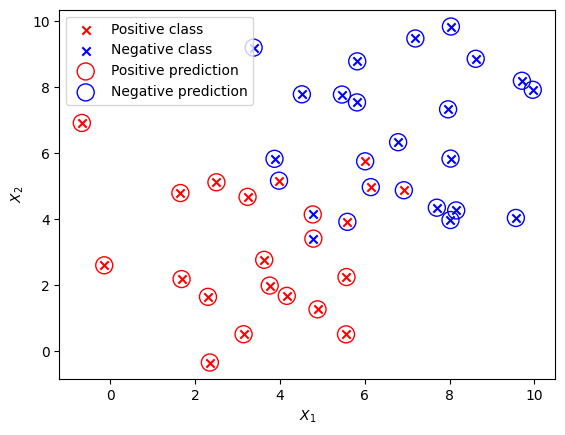

In [65]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.scatter(X[positive_indices,0], X[positive_indices,1], s=150, marker='o', edgecolors='red', facecolors='none')
plt.scatter(X[negative_indices,0], X[negative_indices,1], s=150, marker='o', edgecolors='blue', facecolors='none')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class', 'Positive prediction', 'Negative prediction']) 

In [82]:
example_lr.

array([0., 1.])

In [79]:
theta_1 = example_lr.coef_[0, 0]
theta_2 = example_lr.coef_[0, 1]
print(theta_1, theta_2)

-0.23844806217234274 -0.3071745439425762


In [68]:
theta_0 = example_lr.intercept_

In [69]:
X_1_decision_boundary = np.array([0, 10])

In [70]:
X_2_decision_boundary = (theta_1/theta_2)*X_1_decision_boundary - (theta_0/theta_2)

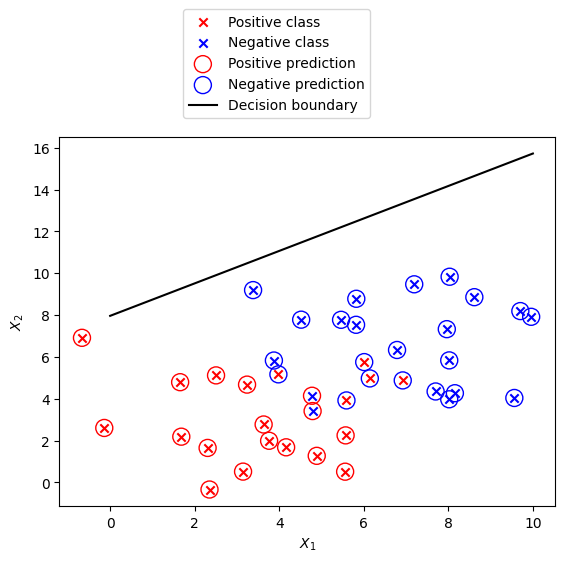

In [72]:
pos_true = plt.scatter(X_1_pos, X_2_pos, color='red', marker='x', label='Positive class')   
neg_true = plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x', label='Negative class')
pos_pred = plt.scatter(X[positive_indices,0], X[positive_indices,1], s=150, marker='o', edgecolors='red', facecolors='none', label='Positive prediction')
neg_pred = plt.scatter(X[negative_indices,0], X[negative_indices,1], s=150, marker='o', edgecolors='blue', facecolors='none', label='Negative prediction')
dec = plt.plot(X_1_decision_boundary, X_2_decision_boundary, 'k-', label='Decision boundary')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(loc=[0.25, 1.05])

# Atividade 3

In [84]:
from sklearn.model_selection import train_test_split

In [87]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,False,False,False,True
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,False,False,False,True
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,False,False,False,True
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,False,False,False,True
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,high school,False,True,False,False
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8998,129,0,0,0,high school,False,True,False,False
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,22000,4200,2000,3100,1,university,False,False,False,True
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1178,1926,52964,1804,1,high school,False,True,False,False


In [88]:
X = df[['PAY_1', 'LIMIT_BAL']].values
y = df['default payment next month'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [89]:
log_reg = LogisticRegression(solver='liblinear')

In [90]:
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [96]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [92]:
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)

In [93]:
ones_and_features = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
intercept_and_coefs = np.concatenate((log_reg.intercept_.reshape(1, 1), log_reg.coef_), axis=1)

In [94]:
X_lin_comb = np.dot(intercept_and_coefs, ones_and_features.T)

In [97]:
y_pred_proba_manual = sigmoid(X_lin_comb)

In [98]:
y_pred_manual = y_pred_proba_manual >= 0.5

In [99]:
np.array_equal(y_pred.reshape(1,-1), y_pred_manual)

True

In [100]:
from sklearn.metrics import roc_auc_score

In [101]:
roc_auc_score(y_test, y_pred_proba_manual.reshape(y_pred_proba_manual.shape[1],))

0.627207450280691

In [102]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.627207450280691